# Sarah Li-Wong

## Research question/interests
I am interested in analyzing the dataset to learn if there is a correlation between where a track was produced and how many times it was listened to.

## Task 1: Exploratory Data Analysis (EDA)

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings

warnings.simplefilter(action='ignore')
sns.set_theme(style="ticks", color_codes=True)


## Raw Data

Loaded the raw dataset

In [ ]:
data = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

Preview and statistics of the raw dataset that I will be using.

In [ ]:
print("Number of rows and columns respectively:", data.shape)
print("Columns in the dataset:", data.columns)

In [ ]:
data.head()

These are the top five rows of the tracks dataset. The output shows that we have 106576 entries with 53 columns. The column name data is divided between the header row and row 0. Row 1 and on shows the numeric data.

In [ ]:
data.describe().T

Summary statistics table that indicates the spread of the data. Can be used later to compare with the histograms.

In [ ]:
# This command prints each column's header row and sub-categories at row 0.
data.iloc[0]

## Task 2: Data Analysis Pipeline

The code below allows us to check for missing values in the dataframe. We will drop unnecessary rows and rows with missing values. We will also select columns that we need.

In [ ]:
# Generate preview of entries with null values
if data.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(data[data.isnull().any(axis=1)].head(3))
    data.dropna(axis=0, how='any')
    plt.show()

In [ ]:
#Remove row 1
data = data.drop(data.index[1])

data.head()

The code below allows us to check for duplicated entries, which we will drop if presented.

In [ ]:
# Generate count statistics of duplicate entries
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("No duplicated entries found")

For easier understanding, we will select and manually rename some columns.

In [ ]:
data = data[['Unnamed: 0','track.7', 'track.14', 'artist.12', 'artist.9', 'album.2']].rename(columns={'Unnamed: 0': 'Track ID', 'track.7': 'Genre', 'track.14': 'Listens', 'artist.12': 'Artist Name', 'artist.9': 'Location', 'album.2': 'Release Date'}).dropna(axis=0, how='any')
data

## Task 3: Method Chaining

Method chaining function is located in project_functions3.py under unprocessed

In [ ]:
#Load dataset
data = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

#Method chaining from a function
data = (
    data
    #Remove row 1
    .drop(data.index[1])
    #Select needed columns that we will be using for the analysis
    .loc[:, ['Unnamed: 0','track.7', 'track.14', 'artist.12', 'artist.9', 'album.2']]
    #Rename columns that we will be using for the analysis
    .rename(columns={'Unnamed: 0': 'Track ID', 'track.7': 'Genre', 'track.14': 'Listens', 'artist.12': 'Artist Name', 'artist.9': 'Location', 'album.2': 'Release Date'})
    #Drop rows with na values
    .dropna(axis=0, how='any')
)

data

## Task 4: Data Analysis

Research Question: Analyze the dataset to learn if there is a correlation between where a track was produced and how many times it was listened to.

Now that we have Genre, Listens, Artist Name, Location, and Release Date, we can graph them individually.

In [ ]:
# Histogram for Genres in dataframe
plt.figure(figsize=(16,8))
genre_sizes = data.iloc[:, 1].value_counts()
genre_sizes.plot(kind='bar')
plt.ylabel('Number of Tracks')
plt.xlabel('Genre')

In [1]:
data.to_csv("/Users/sarahliwong/school/year4/data301/project-group17-project/data/processed/processed_by_function3.csv")

NameError: name 'data' is not defined

This histogram represents the number of tracks in each genre in the dataframe. It demonstrates that the rock genre has had the most tracks/releases over the years, with over 8000 tracks. This is significantly more than any other genre.

In [35]:
#Listens by location
locations = data["Location"].tolist()
listens = data["Listens"].tolist()
d = {}
for i in range(len(locations)):
    temp = d.keys()
    if locations[i] in temp:
        for key in temp:
            if locations[i] == key:
                d[key]+=int(listens[i])
    else:
        d[locations[i]] = int(listens[i])
listens_by_location = pd.DataFrame(list(d.items()), columns=["Location", "Listens"])
listens_by_location.head()

,Location,Listens
0,New Jersey,64273
1,"Los Angeles, CA",671139
2,"Providence, RI",191439
3,"Chicago, IL",145464
4,"Baltimore, MD",166359


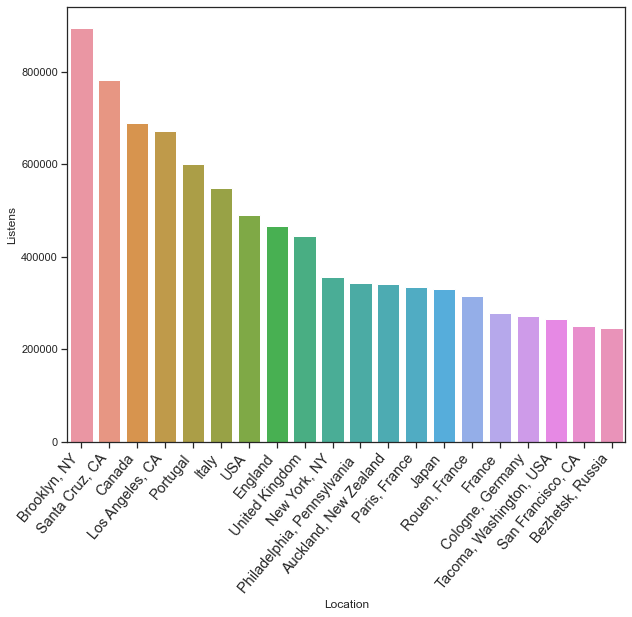

In [36]:
#Printing top 20 locations
lbl_sorted = listens_by_location.sort_values('Listens', ascending = False)
lbl_subset = lbl_sorted[:20]
plt.figure(figsize=(10,8))
sns.barplot(x = 'Location', y = 'Listens', data = lbl_subset)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

This histogram represents the number of listens in each location. It shows that Brooklyn, NY has the most significant amount of listens and is closely followed by Santa Cruz. This could be due to higher populations that listen to music, better music being produced in those locations, or other reasons.

<Figure size 720x576 with 0 Axes>

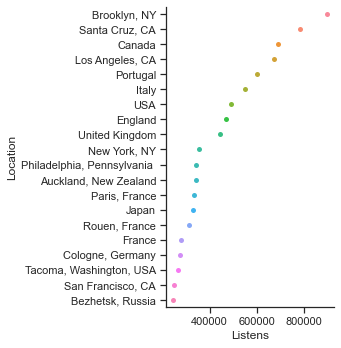

In [37]:
plt.figure(figsize=(10,8))
data = data.explode('Listens')
data['Listens'] = data['Listens'].astype('float')
sns.catplot(x="Listens", y="Location", kind="swarm", data=lbl_subset)

Based on these histograms, which exhibit a higher numbers of listens depending on location, it suggests that there may be a correlation between where a track is produced and how many times it is listened to. It's difficult to say because there are a variety of other elements that can influence how many times a track is played.